In [1]:
#importing pandas package
import pandas as pd
import numpy as np

#Input path where the data of the project resides
path_to_projectData = 'Data/' 

#Reading the TRAINING DATA CSV file
train_data_df = pd.read_csv(path_to_projectData + 'training_data_2_csv_UTF.csv') 

#SELECTING TOP 10 ROWS FROM THE TRAINING DATASET
train_data_df.head(10)

,id,id_str,screen_name,location,description,url,followers_count,friends_count,listedcount,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,has_extended_profile,name,bot
0,8.160000e+17,"""815745789754417152""","""HoustonPokeMap""","""Houston, TX""","""Rare and strong PokŽmon in Houston, TX. See m...","""https://t.co/dnWuDbFRkt""",1291,0,10,"""Mon Jan 02 02:25:26 +0000 2017""",0,False,78554,"""en""","{\r ""created_at"": ""Sun Mar 12 15:44:04 +0...",True,False,False,"""Houston PokŽ Alert""",1
1,4.843621e+09,4843621225,kernyeahx,"Templeville town, MD, USA",From late 2014 Socium Marketplace will make sh...,NaN,1,349,0,2/1/2016 7:37,38,False,31,en,null,True,False,False,Keri Nelson,1
2,4.303727e+09,4303727112,mattlieberisbot,NaN,"Inspired by the smart, funny folks at @replyal...",https://t.co/P1e1o0m4KC,1086,0,14,Fri Nov 20 18:53:22 +0000 2015,0,False,713,en,"{'retweeted': False, 'is_quote_status': False,...",True,False,False,Matt Lieber Is Bot,1
3,3.063139e+09,3063139353,sc_papers,NaN,NaN,NaN,33,0,8,2/25/2015 20:11,0,False,676,en,Construction of human anti-tetanus single-chai...,True,True,False,single cell papers,1
4,2.955142e+09,2955142070,lucarivera16,"Dublin, United States",Inspiring cooks everywhere since 1956.,NaN,11,745,0,1/1/2015 17:44,146,False,185,en,null,False,False,False,lucarivera16,1
5,8.410000e+17,8.41E+17,dantheimprover,"Austin, TX",Just a guy trying to do good by telling everyo...,NaN,1,186,0,13/03/2017 22:53,0,False,11,en,Status(_api=<tweepy.api.API object at 0x101927...,True,False,True,dantheimprover,1
6,2.482835e+09,2482834658,_all_of_us_,in a machine.,bot by @rubicon,NaN,193,0,19,Wed May 07 22:29:25 +0000 2014,0,False,6068,en,"{u'contributors': None, u'truncated': False, u...",False,False,False,everything always,1
7,3.333574e+09,3333573622,KatamariItems,NaN,[Bot rolled up by @BeachEpisode] Cataloguing e...,NaN,8227,2,89,Thu Jun 18 22:07:31 +0000 2015,26,False,2597,en,"{u'contributors': None, u'truncated': False, u...",True,False,False,Katamari Collection,1
8,2.996105e+09,2996105102,AutophagyPapers,NaN,Twitterbot for #Autophagy papers. Curated by @...,NaN,275,0,17,1/25/2015 17:34,23,False,9922,en,Feeding Schedule And Proteolysis Regulate Auto...,False,False,False,Autophagy Papers,1
9,3.271096e+09,3271095818,HSC_papers,NaN,NaN,NaN,51,3,9,7/7/2015 15:23,0,False,2515,en,Functional Selectivity in Cytokine Signaling R...,True,False,False,Hematopoiesis,1


In [2]:
# selecting attributes which have textual, numeric values and categorical values
train_data= train_data_df[['screen_name','location','description','url',
       'followers_count', 'friends_count', 'listedcount','created_at',
       'favourites_count','statuses_count','name']]

#Looking for NaN and NULL values in the following features of the dataframe, and using lambda as defined to replace them with 0
train_data['followers_count']=train_data['followers_count'].apply(lambda x: 0 if x=='None' else 0 if x=='NaN' else x)
train_data['friends_count']=train_data['friends_count'].apply(lambda x: 0 if x=='None' else 0 if x=='NaN' else x)
train_data['list_count']=train_data['listedcount'].apply(lambda x: 0 if x=='None' else 0 if x=='NaN' else x)
train_data['fav_count']=train_data['favourites_count'].apply(lambda x: 0 if x=='None' else 0 if x=='NaN' else x)

#Dropping columns that have been renamed (the XGBOOST classifier which will be used later found discrepancy in the training and test data feature names, which made this step required)
train_data.drop('listedcount', axis=1, inplace=True)
train_data.drop('favourites_count', axis=1, inplace=True)

#y = lambda symbol: 'X' if symbol==True else 'O' if symbol==False else ' '



#Looking for NaN and NULL values in the location  feature of the dataframe, replacing the respective with "" empty strings
train_data['location']=train_data['location'].apply(lambda x: "" if type(x)==float else "" if x=='NaN'
                                                          else "" if x=='None' else x)

#Computing a new column  is_bot_location to replace the textual feature - screenname
train_data['is_bot_location'] = 0
train_data['is_bot_location'] = train_data['location'].apply(lambda x:0 if x=="" else len(x))

#Dropping the location feature in the dataframe as we have replaced it with a numerical version is_bot_location
train_data.drop('location', axis=1, inplace=True)



#Computing a new column 'is_bot_screenname' to replace the textual feature - screenname
train_data['is_bot_screenname']=0
screenname = train_data['screen_name']
flag = []
#Looking for the word bot/BOT/Bot in screenname and appending the length of the screenname, if we have a success, else 0
for x in screenname:
    x = str(x)
    if 'bot' in x or 'BOT' in x or 'Bot' in x:
        flag.append(len(x))
    else:
        flag.append(0)
train_data['is_bot_screenname']=flag
#Dropping the screen_name feature in the dataframe as we have replaced it with a numerical version is_bot_screenname
train_data.drop('screen_name', axis=1, inplace=True)



#Computing a new column 'is_bot_description' to replace the textual feature - description
train_data['is_bot_description']=0
description = train_data['description']
flag = []
#Looking for the word bot/BOT/Bot in 'description' and appending the length of the description, if we have a success, else 0
for x in description:
    x = str(x)
    if 'bot' in x or 'BOT' in x or 'Bot' in x:
        flag.append(len(x))
    else:
        flag.append(0)
train_data['is_bot_description']=flag
#Dropping the 'description' feature in the dataframe as we have replaced it with a numerical version is_bot_description
train_data.drop('description', axis=1, inplace=True)



#Computing a new column 'is_bot_name' to replace the textual feature - name
train_data['is_bot_name']=0
description = train_data['name']
flag = []
for x in description:
    x = str(x)
    if 'bot' in x or 'BOT' in x or 'Bot' in x:
        flag.append(len(x))
    else:
        flag.append(0)
train_data['is_bot_name']=flag
#Dropping the 'name' feature in the dataframe as we have replaced it with a numerical version is_bot_name
train_data.drop('name', axis=1, inplace=True)


#Computing the number of days since the profile has been created
timestamp = train_data_df['created_at']
train_data['age_of_profile']=0
profile_age=[]
from datetime import datetime
#Preparing a list of date formats which are currently present in the 'created_at' feature of our dataframe
DATE_FORMATS = ['%a %b %d %H:%M:%S +0000 %Y','"%a %b %d %H:%M:%S +0000 %Y"','%Y-%m-%d %H:%M:%S','%d/%m/%Y %H:%M' , '%m/%d/%Y %H:%M']

#Looping through each row, and each date 
#CHECK IF THE FORMAT IS IN ACCORDANCE TO THE LIST DECLARED ABOVE
#Compute the current date and find the difference with the computed 'created_at'
for i in timestamp:
    try:
        for dateformat in DATE_FORMATS:
            try:
                my_date = datetime.strptime(i,dateformat)
                break
            except ValueError:
                pass
        today = datetime.today()
        difference = today - my_date
        profile_age.append(difference.days)
    except ValueError:
        pass

train_data['age_of_profile']=profile_age
#Dropping the feature 'created_at' in the dataframe as we have replaced it with a numerical version age_of_profile
train_data.drop('created_at', axis=1, inplace=True)


#Computing the URL length
train_data['is_url']=0
train_data['url'].fillna(0,inplace=True)

description = train_data['url']
flag = []
for x in description:
    x = str(x)
    if x == 'None' or x=='0':
        flag.append(0)
    else:
        flag.append(len(x))
train_data['is_url']=flag
#Dropping the feature 'created_at' in the dataframe as we have replaced it with a numerical version age_of_profile
train_data.drop('url', axis=1, inplace=True)


#PREPARING THE X_TRAIN DATA WITH THE NEW COMPUTED TRAIN_DATA VERSION
X_train=train_data

#PREPARING Y_TRAIN WITH ONLY THE BOT COLUMN DATA FROM THE DATAFRAME
Y_train=train_data_df['bot']

#DISPLAYING ALL THE ROWS OF X_TRAIN
X_train


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-cop

,followers_count,friends_count,statuses_count,list_count,fav_count,is_bot_location,is_bot_screenname,is_bot_description,is_bot_name,age_of_profile,is_url
0,1291,0,78554,10,0,13,0,0,0,126,25
1,1,349,31,0,38,25,0,0,0,492,0
2,1086,0,713,14,0,0,15,128,18,534,23
3,33,0,676,8,0,0,0,0,0,802,0
4,11,745,185,0,146,21,0,0,0,858,0
5,1,186,11,0,0,10,0,0,0,55,0
6,193,0,6068,19,0,13,0,15,0,1096,0
7,8227,2,2597,89,26,0,0,148,0,689,0
8,275,0,9922,17,23,0,0,55,0,834,0
9,51,3,2515,9,0,0,0,0,0,671,0


Feature ranking:
1. feature 9 (0.428193)
2. feature 4 (0.079025)
3. feature 2 (0.073322)
4. feature 1 (0.070192)
5. feature 7 (0.068170)
6. feature 0 (0.066368)
7. feature 3 (0.055270)
8. feature 5 (0.049324)
9. feature 6 (0.047338)
10. feature 10 (0.045118)
11. feature 8 (0.017680)


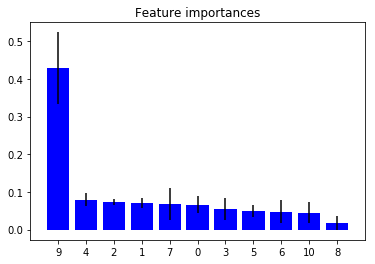

In [4]:

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features
X= train_data
y= Y_train

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. Feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="b", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
#Reading the TEST data CSV file
test_data_df= pd.read_csv(path_to_projectData + 'test_data_4_students.csv')

test_data_df=test_data_df.head(575)

# Selecting Attributes which have textual, numeric values and categorical values
test_data= test_data_df[['screen_name','location','description','url',
       'followers_count', 'friends_count', 'listed_count','created_at',
       'favorites_count','statuses_count','name']]

#Looking for NaN and NULL values in the following feature of the dataframe, and using lambda as defined to replace them with 0
#df.Age.apply(lambda x: x if not pd.isnull(x) else 'Is Null value')
test_data['followers_count']=test_data['followers_count'].apply(lambda x: 0 if x=='None' else 0 if x=='NaN' else x)
test_data['friends_count']=test_data['friends_count'].apply(lambda x: 0 if x=='None' else 0 if x=='NaN' else x)
test_data['list_count']=test_data['listed_count'].apply(lambda x: 0 if x=='None' else 0 if x=='NaN' else x)
test_data['fav_count']=test_data['favorites_count'].apply(lambda x: 0 if x=='None' else 0 if x=='NaN' else x)
#Dropping columns that have been renamed (the XGBOOST classifier which will be used later found discrepancy in the training and test data feature names, which made this step required)
test_data.drop('listed_count', axis=1, inplace=True)
test_data.drop('favorites_count', axis=1, inplace=True)
#y = lambda symbol: 'X' if symbol==True else 'O' if symbol==False else ' '
test_data['followers_count'].fillna(0,inplace=True)
test_data['friends_count'].fillna(0,inplace=True)
test_data['statuses_count'].fillna(0,inplace=True)

#Looking for NaN and NULL values in the location  feature of the dataframe, replacing the respective with "" empty strings
test_data['location']=test_data['location'].apply(lambda x: "" if type(x)==float else "" if x=='NaN'
                                                          else "" if x=='None' else x)

#Computing a new column  is_bot_location to replace the textual feature - screenname
test_data['is_bot_location'] = 0
test_data['is_bot_location'] = test_data['location'].apply(lambda x:0 if x=="" else len(x))

#Dropping the location feature in the dataframe as we have replaced it with a numerical version is_bot_location
test_data.drop('location', axis=1, inplace=True)



#Computing a new column 'is_bot_screenname' to replace the textual feature - screenname
test_data['is_bot_screenname']=0
screenname = test_data['screen_name']
flag = []
#Looking for the word bot/BOT/Bot in screenname and appending the length of the screenname, if we have a success, else 0
for x in screenname:
    x = str(x)
    if 'bot' in x or 'BOT' in x or 'Bot' in x:
        flag.append(len(x))
    else:
        flag.append(0)
test_data['is_bot_screenname']=flag
#Dropping the screen_name feature in the dataframe as we have replaced it with a numerical version is_bot_screenname
test_data.drop('screen_name', axis=1, inplace=True)



#Computing a new column 'is_bot_description' to replace the textual feature - description
test_data['is_bot_description']=0
description = test_data['description']
flag = []
#Looking for the word bot/BOT/Bot in 'description' and appending the length of the description, if we have a success, else 0
for x in description:
    x = str(x)
    if 'bot' in x or 'BOT' in x or 'Bot' in x:
        flag.append(len(x))
    else:
        flag.append(0)
test_data['is_bot_description']=flag
#Dropping the 'description' feature in the dataframe as we have replaced it with a numerical version is_bot_description
test_data.drop('description', axis=1, inplace=True)



#Computing a new column 'is_bot_name' to replace the textual feature - name
test_data['is_bot_name']=0
description = test_data['name']
flag = []
for x in description:
    x = str(x)
    if 'bot' in x or 'BOT' in x or 'Bot' in x:
        flag.append(len(x))
    else:
        flag.append(0)
test_data['is_bot_name']=flag
#Dropping the 'name' feature in the dataframe as we have replaced it with a numerical version is_bot_name
test_data.drop('name', axis=1, inplace=True)


#Computing the number of days since the profile has been created
timestamp = test_data['created_at']
test_data['age_of_profile']=0
profile_age=[]
from datetime import datetime

#Preparing a list of date formats which are currently present in the 'created_at' feature of our dataframe
DATE_FORMATS = ['%a %b %d %H:%M:%S +0000 %Y','"%a %b %d %H:%M:%S +0000 %Y"','%Y-%m-%d %H:%M:%S','%d/%m/%Y %H:%M' , '%m/%d/%Y %H:%M']

#Looping through each row, and each date 
#CHECK IF THE FORMAT IS IN ACCORDANCE TO THE LIST DECLARED ABOVE
#Compute the current date and find the difference with the computed 'created_at'
#computing the number of days since profile creation

for i in timestamp:
    try:
        for dateformat in DATE_FORMATS:
            try:
                my_date = datetime.strptime(i,dateformat)
                break
            except ValueError:
                pass
        today = datetime.today()
        difference = today - my_date
        profile_age.append(difference.days)
    except ValueError:
        pass

test_data['age_of_profile']=profile_age
#Dropping the feature 'created_at' in the dataframe as we have replaced it with a numerical version age_of_profile
test_data.drop('created_at', axis=1, inplace=True)


#Computing the URL length
test_data['is_url']=0
test_data['url'].fillna(0,inplace=True)

description = test_data['url']
flag = []
for x in description:
    x = str(x)
    if x == 'None' or x=='0':
        flag.append(0)
    else:
        flag.append(len(x))
test_data['is_url']=flag
#Dropping the feature 'created_at' in the dataframe as we have replaced it with a numerical version age_of_profile
test_data.drop('url', axis=1, inplace=True)

#PREPARING THE X_TEST DATA WITH THE NEW COMPUTED TRAIN_DATA VERSION
X_test=test_data

#DISPLAYING ALL THE ROWS OF X_TEST
X_test



In [ ]:
#IMPORTING THE XGBOOST CLASSIFIER TO PREDICT OUR TWITTER PROFILES
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
import numpy as np

# CONVERTING THE X_TRAIN AND Y_TRAIN ELEMENTS INTO FLOAT32
X_train = X_train.astype('float32')
X_test=X_test.astype('float32')

# Prepare the inputs for the model
xgb= xgb.XGBClassifier(learning_rate = 0.03,
 n_estimators= 300,
 max_depth= 3,
 min_child_weight= 2,
 subsample=0.4,
 colsample_bytree=0.2,
 objective= 'binary:logistic',
 nthread= 0,
 scale_pos_weight=1)
clf = xgb.fit(X_train,Y_train)

predictions = clf.predict(X_test)
predictions

test_data['bot'] = np.array(predictions)

result = pd.DataFrame(test_data_df['id'])

result  = result.astype(np.int64)
result['Bot'] = test_data['bot']
result
print (result['id'].dtype)
print (result['Bot'].dtype)
print (result)

#EXPORTING RESULTS
result.to_csv('output_xgb_0508_2.csv',  index=False)

In [ ]:
# ##### Importing the RandomForestClassifier and predicting whether the profile is a bot or not using it
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import roc_auc_score

# rfc= RandomForestClassifier(n_estimators=200,oob_score= True,n_jobs=-1,random_state=42,max_features="auto"
#                             ,min_samples_leaf=1,max_depth=15)
# rfc.fit(X_train,Y_train)
# rfc_predictions=rfc.predict(X_test)
# rfc_predictions

# test_data['bot'] = np.array(rfc_predictions)

# result = pd.DataFrame(test_data_df['id'])

# result  = result.astype(np.int64)
# result['bot'] = test_data['bot']
# result
# print (result['id'].dtype)
# print (result['bot'].dtype)
# print (result)

# result.to_csv('output_rfc_new.csv',  index=False)

# # # # #Printing the Confusion Matrix and Classification Report for RandomForestClassifier
# # # # #print
# # # # #print(confusion_matrix(Y_test,rfc_predictions))
# # # # #print('\n')
# # # # #print(classification_report(Y_test,rfc_predictions))
# # # # #print("accuracy score: {} ".format(accuracy_score(Y_test, rfc_predictions)))  
# # # # #print("AUC: {}".format(roc_auc_score(Y_test,rfc_predictions)))

In [ ]:
from sklearn.cross_validation import cross_val_score
accuracyScore = cross_val_score(xgb,X_train, Y_train, cv=5, scoring='accuracy')
print("Accuracy = ",accuracyScore.mean())

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

X_train,X_test,Y_train,Y_test=train_test_split(X_train,Y_train,test_size=0.15,random_state=50)
rfc= RandomForestClassifier(n_estimators=200,oob_score= True,n_jobs=-1,random_state=50,max_features="auto"
                            ,min_samples_leaf=1,max_depth=15)
rfc.fit(X_train,Y_train)
rfc_predictions=rfc.predict(X_test)
rfc_predictions
#Printing the Confusion Matrix and Classification Report for RandomForestClassifier
#print
print(confusion_matrix(Y_test,rfc_predictions))
print('\n')
print(classification_report(Y_test,rfc_predictions))
print("accuracy score: {} ".format(accuracy_score(Y_test, rfc_predictions)))  
print("AUC: {}".format(roc_auc_score(Y_test,rfc_predictions)))